In [1]:
import pandas as pb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pb.read_csv("State.csv")
df

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,1/30/2020,Kerala,1,0,0,0,NaN
1,2/2/2020,Kerala,2,0,0,0,NaN
2,2/3/2020,Kerala,3,0,0,0,NaN
3,2/14/2020,Kerala,3,3,0,0,NaN
4,3/2/2020,Delhi,1,0,0,0,NaN
...,...,...,...,...,...,...,...
7891,10/28/2020,Tamil Nadu,714235,675518,10983,0,9732863.0
7892,10/28/2020,Tripura,30290,28130,341,23,452230.0
7893,10/28/2020,Uttar Pradesh,474054,440847,6940,0,14421272.0
7894,10/28/2020,Uttarakhand,60957,55610,1007,475,1021965.0


In [3]:
df.head() #checking the first five rows

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,1/30/2020,Kerala,1,0,0,0,NaN
1,2/2/2020,Kerala,2,0,0,0,NaN
2,2/3/2020,Kerala,3,0,0,0,NaN
3,2/14/2020,Kerala,3,3,0,0,NaN
4,3/2/2020,Delhi,1,0,0,0,NaN


In [4]:
df.tail() #checking last five rows

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
7891,10/28/2020,Tamil Nadu,714235,675518,10983,0,9732863.0
7892,10/28/2020,Tripura,30290,28130,341,23,452230.0
7893,10/28/2020,Uttar Pradesh,474054,440847,6940,0,14421272.0
7894,10/28/2020,Uttarakhand,60957,55610,1007,475,1021965.0
7895,10/28/2020,West Bengal,357779,314003,6604,0,4382678.0


In [5]:
df.info() # printing the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7896 entries, 0 to 7895
Data columns (total 7 columns):
Date         7896 non-null object
State        7896 non-null object
Confirmed    7896 non-null int64
Recovered    7896 non-null int64
Deceased     7896 non-null int64
Other        7896 non-null int64
Tested       7161 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 431.9+ KB


In [6]:
df.isna().sum() # finding the count of missing values from different columns

Date           0
State          0
Confirmed      0
Recovered      0
Deceased       0
Other          0
Tested       735
dtype: int64

In [7]:
df['date_num']=pb.factorize(df.Date)[0]
df

,Date,State,Confirmed,Recovered,Deceased,Other,Tested,date_num
0,1/30/2020,Kerala,1,0,0,0,NaN,0
1,2/2/2020,Kerala,2,0,0,0,NaN,1
2,2/3/2020,Kerala,3,0,0,0,NaN,2
3,2/14/2020,Kerala,3,3,0,0,NaN,3
4,3/2/2020,Delhi,1,0,0,0,NaN,4
...,...,...,...,...,...,...,...,...
7891,10/28/2020,Tamil Nadu,714235,675518,10983,0,9732863.0,244
7892,10/28/2020,Tripura,30290,28130,341,23,452230.0,244
7893,10/28/2020,Uttar Pradesh,474054,440847,6940,0,14421272.0,244
7894,10/28/2020,Uttarakhand,60957,55610,1007,475,1021965.0,244


In [8]:
df.Date.values

array(['1/30/2020', '2/2/2020', '2/3/2020', ..., '10/28/2020',
       '10/28/2020', '10/28/2020'], dtype=object)

In [9]:
df.Date.value_counts()

6/8/2020     36
7/4/2020     36
6/3/2020     36
6/21/2020    36
5/28/2020    36
             ..
3/2/2020      3
2/2/2020      1
2/3/2020      1
2/14/2020     1
1/30/2020     1
Name: Date, Length: 245, dtype: int64

In [10]:
df.date_num.value_counts()

119    36
89     36
107    36
103    36
99     36
       ..
4       3
2       1
3       1
1       1
0       1
Name: date_num, Length: 245, dtype: int64

In [11]:
df.dtypes

Date          object
State         object
Confirmed      int64
Recovered      int64
Deceased       int64
Other          int64
Tested       float64
date_num       int64
dtype: object

In [12]:
df['state_num']=pb.factorize(df.State)[0]
df

,Date,State,Confirmed,Recovered,Deceased,Other,Tested,date_num,state_num
0,1/30/2020,Kerala,1,0,0,0,NaN,0,0
1,2/2/2020,Kerala,2,0,0,0,NaN,1,0
2,2/3/2020,Kerala,3,0,0,0,NaN,2,0
3,2/14/2020,Kerala,3,3,0,0,NaN,3,0
4,3/2/2020,Delhi,1,0,0,0,NaN,4,1
...,...,...,...,...,...,...,...,...,...
7891,10/28/2020,Tamil Nadu,714235,675518,10983,0,9732863.0,244,7
7892,10/28/2020,Tripura,30290,28130,341,23,452230.0,244,31
7893,10/28/2020,Uttar Pradesh,474054,440847,6940,0,14421272.0,244,5
7894,10/28/2020,Uttarakhand,60957,55610,1007,475,1021965.0,244,14


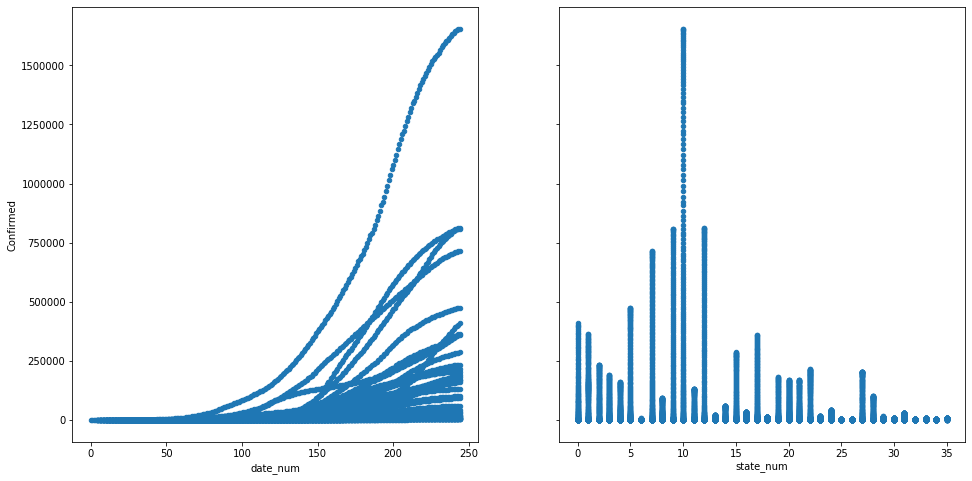

In [13]:
fig, axs = plt.subplots(1, 2, sharey=True)
df.plot(kind='scatter', x='date_num', y='Confirmed', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='state_num', y='Confirmed', ax=axs[1])
#data.plot(kind='scatter', x='Date', y='sales', ax=axs[2])

In [14]:
X=np.array(df['date_num'].values)
y=np.array(df['Confirmed'].values)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [15]:
X_train

array([201, 145, 139, ...,  68,  95,  98], dtype=int64)

In [16]:
y_train

array([105898, 180643,    558, ...,    741,  17217,   9862], dtype=int64)

In [17]:
X_test

array([ 49, 227,  56, ..., 174,  67, 202], dtype=int64)

In [18]:
y_test

array([    1,  7683,   170, ..., 82087,     0, 10795], dtype=int64)

In [19]:
#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
reg=linear_model.LinearRegression()

X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

reg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
#predict a value
predict=reg.predict([[244]])
print(predict)

[[170394.50379865]]


In [21]:
print('Coefficients: \n', reg.coef_) #print the coefficients

Coefficients: 
 [[987.31968917]]


In [22]:
print('intercept: \n', reg.intercept_) #print the intercept

intercept: 
 [-70511.50036]


In [23]:
acc=reg.score(X_test,y_test) #find the accuracy
print(acc)

0.1609257996523552


In [24]:
#y=mx+c
(987.31968917*244)+(-70511.50036)

170394.50379748